In [1]:
import urllib.request
import nltk


In [2]:
response= urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html=response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"87a1f0f6-12ab-4ed5-9c7a-57c0e374f3d5","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1041584772,"wgRevisionId":1041584772,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","All articles with dead external links","Articles with dead external links from August 2021","Articles with permanently dead external links","CS1 m

In [3]:
from bs4 import BeautifulSoup
import urllib.request
response= urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html=response.read()

In [4]:
soup=BeautifulSoup(html,"html5lib")
text=soup.get_text(strip=True)
tokens = [t for t in text.split()]

In [5]:
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    if val > 5:
        print (str(key)+':'+str(val))

SpaceX:144
articles:6
with:82
dead:10
external:6
from:58
August:34
original:175
American:7
in:195
September:30
not:10
on:245
using:7
company:38
containing:6
October:19
is:66
and:218
identifiers","Articles:8
companies:13
of:258
the:533
United:7
established:6
launch:96
service:6
based:8
Los:11
Angeles:8
Greater:6
to:276
private:22
article:17
about:8
rocket:39
For:6
Exploration:7
Technologies:6
December:45
a:159
flight:18
Falcon:92
9:75
are:21
May:69
19:12
landing:20
billion:17
Musk:31
1em:6
0.4em:6
part:7
Boring:8
Crew:24
over:10
Test:9
an:29
was:53
space:23
costs:6
crew:12
spacecraft:18
first:80
privately:6
orbit:10
successfully:14
orbit,:6
send:10
International:7
Space:72
Station:6
orbital:15
astronauts:9
theInternational:14
Dragon:45
has:34
one:11
developing:6
satellite:27
Starlink:25
provide:13
commercial:22
internet:7
In:12
January:34
2020:8
constellation:9
also:15
Starship:25
vehicle:15
9,:8
Heavy:15
will:12
be:10
reusable:9
have:9
its:30
for:109
early:14
1:39
Dragon,:6
NASA:34
Com

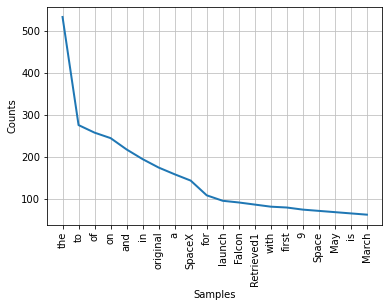

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
freq.plot(20,cumulative=False)



In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/scluser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopwords.words('english')
clean_tokens=tokens[:]
sr=stopwords.words('english')



In [9]:
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

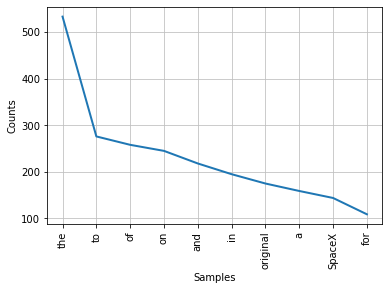

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
freq.plot(10, cumulative=False)

In [12]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=160659 sha256=a8cd308e4df9c4497644c542898263bbcc379329e41d557f528f4d0e8976b5ab
  Stored in directory: /Users/scluser/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


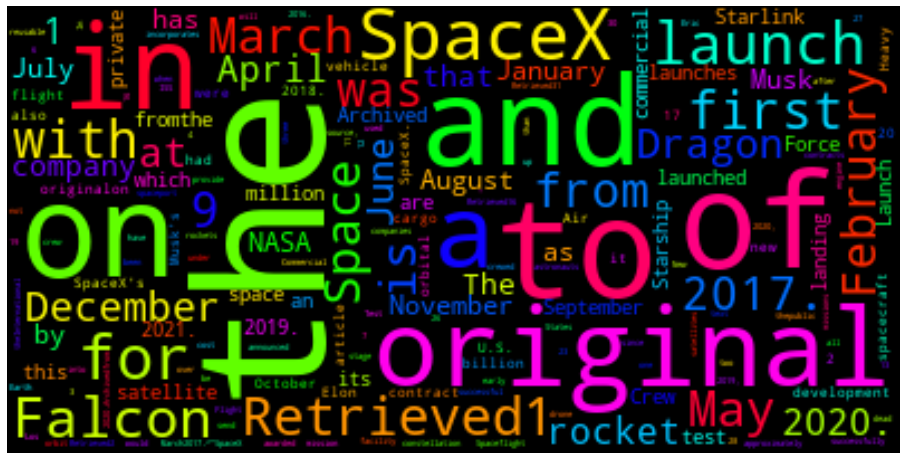

In [13]:
from collections import Counter
dictionary=Counter(freq)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()